### AMAZON STOCK PRICE PREDICITON

Stock Market Prediction is the act of trying to determine the future value of company stock or other financial instrument traded on an exchange. The successful prediction of a stock’s future price can yield a high profit. Also, we know that the market is highly unstable and changes significantly when a new political party is formed after every 5 years due to a change in government policies for business.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import warnings


In [2]:
# Load our datset 
stock=pd.read_csv(r"C:\Users\Hp\Downloads\mydata.csv",parse_dates=['Date'])
stock.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Gain,Loss,...,Usd_Rub_Close,Usd_Try_Close,IRX_Close,JPM_Close,BAC_Close,Citigroup_Close,WFC_Close,NASDAQ_Close,SP_500_Close,Dow_Jones_Close
0,2005-01-03,44.95,45.44,44.21,44.52,10446500,0,0.0,0.23,0.00,...,27.71,1.3440,2.204,26.45,34.03,440.71,19.30,2152.149902,1202.079956,10729.429688
1,2005-01-04,42.67,43.26,41.50,42.14,19418500,0,0.0,0.00,2.38,...,27.71,1.3510,2.292,26.18,33.56,436.96,19.31,2107.860107,1188.050049,10630.780273
2,2005-01-05,41.57,42.76,41.56,41.77,8354200,0,0.0,0.00,0.37,...,27.86,1.3740,2.282,26.24,33.17,442.44,19.33,2091.239990,1183.739990,10597.830078
3,2005-01-06,41.81,42.25,40.90,41.05,8700900,0,0.0,0.00,0.72,...,27.77,1.3925,2.267,26.39,33.12,446.73,19.40,2090.000000,1187.890015,10622.879883
4,2005-01-07,41.38,42.69,41.16,42.32,9836600,0,0.0,1.27,0.00,...,27.75,1.3940,2.277,26.17,32.76,444.17,19.38,2088.610107,1186.189941,10603.959961


## Data Exploration and Cleaning

In [3]:
# Drop all columns and only retain Date and Close for our forecasting
stock=stock[['Date','Close']]
stock.head()

,Date,Close
0,2005-01-03,44.52
1,2005-01-04,42.14
2,2005-01-05,41.77
3,2005-01-06,41.05
4,2005-01-07,42.32


In [4]:
# set our dat(e column as index
stock.set_index('Date',inplace=True)
stock.head()

,Close
Date,
2005-01-03,44.52
2005-01-04,42.14
2005-01-05,41.77
2005-01-06,41.05
2005-01-07,42.32


In [5]:
# checking for null values
stock.isnull().sum()

Close    0
dtype: int64

In [6]:
# check  and droppinjg duplicates
print(stock.duplicated().any())
stock.drop_duplicates()

True


,Close
Date,
2005-01-03,44.52
2005-01-04,42.14
2005-01-05,41.77
2005-01-06,41.05
2005-01-07,42.32
...,...
2019-08-16,1792.57
2019-08-19,1816.12
2019-08-20,1801.38


In [7]:
# Descriptive statistics on our dataset
stock.describe()

,Close
count,3552.000000
mean,451.876593
std,527.147584
min,26.070000
25%,80.587500
50%,231.700000
75%,617.777500
max,2039.510000


## Visualizing Daily Closing Stocks

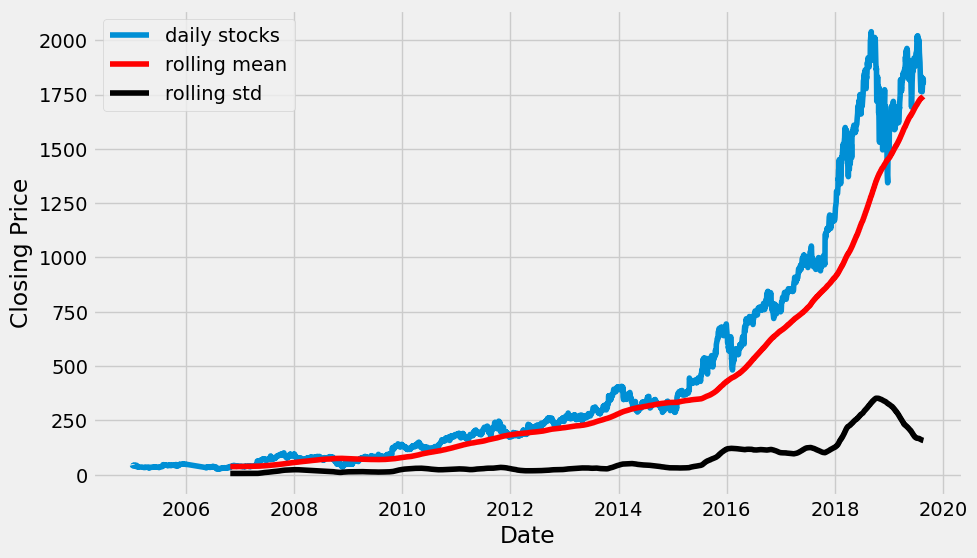

In [8]:
rolling_mean=stock.rolling(window=365).mean()
rolling_std=stock.rolling(window=365).std()
# visualizing our time series
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.plot(stock['Close'],label='daily stocks')
plt.plot(rolling_mean,color='red',label='rolling mean')
plt.plot(rolling_std,color='black',label='rolling std')
plt.legend(loc='best')
plt.show()

## Stationarity Check

<Figure size 1200x600 with 0 Axes>

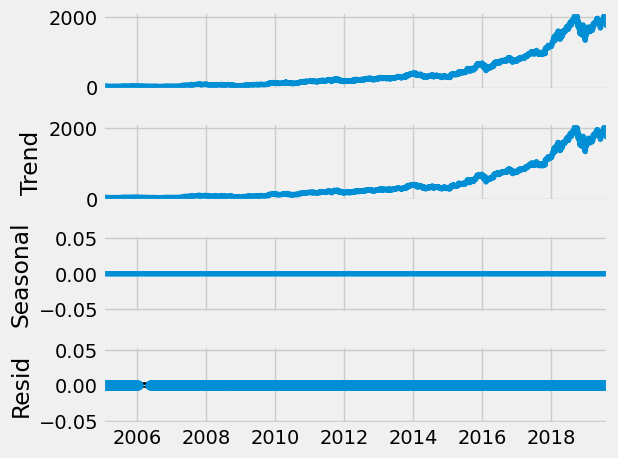

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(12,6))
decomposition =seasonal_decompose(stock,model='additive',period=1)
decomposition.plot()
plt.show()

## Augmented Dickey Fuller Test

Null Hypothesis: The series has a unit root implying its not stationary

Alternate Hypothesis: The series has no unit root thus stationary

we shall reject the null hypothesis if p value is less than 0.05 and test statistic less than critical value

In [10]:
from statsmodels.tsa.stattools import adfuller
Adftest=adfuller(stock,autolag='AIC')
print(f'p_value : {Adftest[1]}')
print(f'Test Statistic : {Adftest[0]}')
for key,values in Adftest[4].items():
    print(f'Criticality {key}:{values}')

p_value : 0.9983821165428911
Test Statistic : 1.8169853705976817
Criticality 1%:-3.4322085838690244
Criticality 5%:-2.862361217190852
Criticality 10%:-2.567207147908185


### Differencing to achieve Stationarity

In [11]:
stock2=stock.diff().dropna()
# checking for stationarity
Adftest=adfuller(stock2,autolag='AIC')
print(f'p_value : {Adftest[1]}')
print(f'Test Statistic : {Adftest[0]}')
for key,values in Adftest[4].items():
    print(f'Criticality {key}:{values}')

p_value : 6.301189483546866e-20
Test Statistic : -11.01171270578772
Criticality 1%:-3.4322085838690244
Criticality 5%:-2.862361217190852
Criticality 10%:-2.567207147908185


## Determing values of p and q

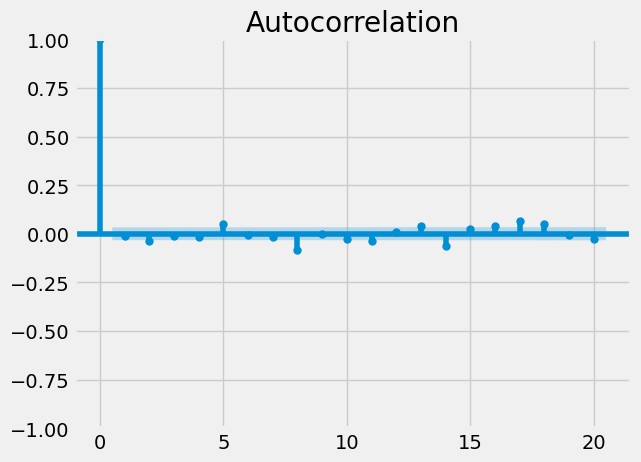

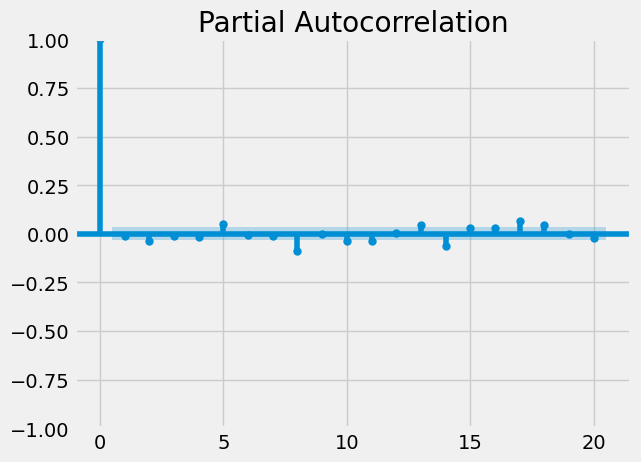

In [12]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(stock2,lags=20)
plot_pacf(stock2,lags=20)
plt.show()

The autocorrelation results shows data for 5 days ago has the highest correlation. Similarly partial autocorrelation results shows data for last 5 days has the highest correlation 

## Building ARIMA model

In [20]:
index=int(0.9*stock.shape[0])
train_set=stock[:index]
test_set=stock[index:]

In [21]:
import warnings
from statsmodels.tsa.arima.model import ARIMA
warnings.filterwarnings("ignore")
model=ARIMA(train_set,order=(5,1,5)).fit()

## Model Evaluation

In [22]:
from sklearn.metrics import mean_squared_error
prediction=model.predict(start=len(train_set),end=len(train_set)+len(test_set)-1)
prediction.index=test_set.index
error=np.sqrt(mean_squared_error(test_set,prediction))
print(error)

141.19745769520028


## Visualizing Our Predicted Results

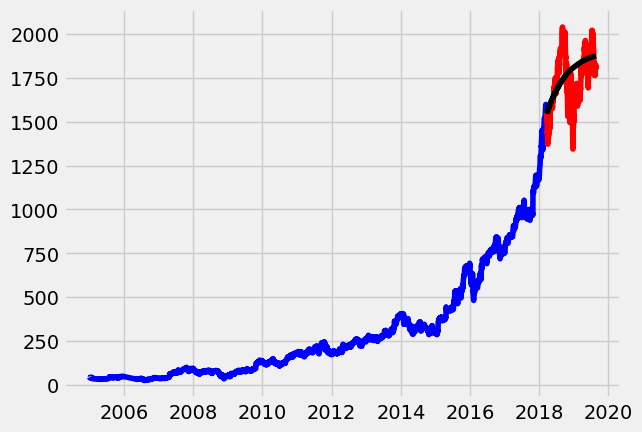

In [24]:
plt.plot(train_set,color='blue',label='Training')
plt.plot(test_set,color='red',label='Testing')
plt.plot(prediction,color='black',label='Predicted')

Model performance not very satisfactory. We use Neural networks to model the data since they are much capable of capturing hidden patterns in complex data.

In [2]:
!jupyter nbconvert --to webpdf --allow-chromium-download AMAZON_STOCK_FORECASTING_ARIMA.ipynb

[NbConvertApp] Converting notebook AMAZON_STOCK_FORECASTING_ARIMA.ipynb to webpdf
[NbConvertApp] Building PDF
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 316010 bytes to AMAZON_STOCK_FORECASTING_ARIMA.pdf
